# KNN & Experimentation
## Wisconsin Breast Cancer Diagnosis Prediction
## Importing Packages 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pylab import rcParams
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from matplotlib.pylab import rcParams
%matplotlib inline

In [49]:
diagnosis = pd.read_csv("wisconsin_breast_cancer_diagnosis.csv")

In [50]:
rcParams['figure.figsize'] = 15, 6
diagnosis= diagnosis[pd.notnull(diagnosis['diagnosis'])]

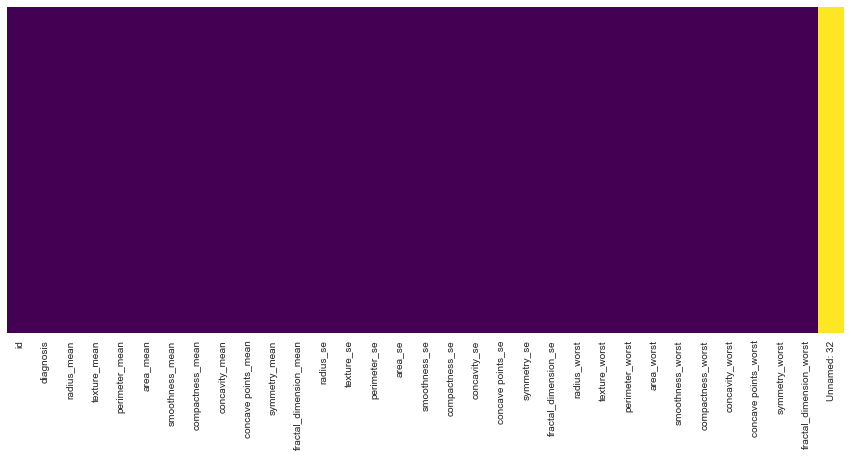

In [51]:
sns.heatmap(diagnosis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
diagnosis.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
diagnosis.iloc[:,2:32].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:


X = diagnosis.iloc[:,2:32]  
y = diagnosis.iloc[:,1]
y.replace(['B', 'M'], [0, 1], inplace=True)


In [55]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)


In [56]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)


print('Train accuracy = {0}%'.format(np.round(classifier.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(classifier.score(X_test, y_test) * 100, 2)))
predictions = classifier.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 96.76%
Test accuracy = 96.49%

 Confusion Matrix: 

[[107   1]
 [  5  58]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       108
          1       0.98      0.92      0.95        63

avg / total       0.97      0.96      0.96       171



### Experiment 1
#### Number of neighbours in KNN

In [58]:
accuracy_validation = [None]*16



count=0    
for noOfNeighbours in range(151,0,-10):
    # Fitting K-NN to the Training set
    classifier = KNeighborsClassifier(n_neighbors = noOfNeighbours, metric = 'euclidean', p = 2)
    classifier.fit(X_train, y_train)
    accuracy_validation[count] = classifier.score(X_val,y_val)  
    count+=1

In [59]:
accuracy_validation

[0.8916666666666667,
 0.8916666666666667,
 0.9083333333333333,
 0.925,
 0.9333333333333333,
 0.9416666666666667,
 0.95,
 0.9583333333333334,
 0.9583333333333334,
 0.9666666666666667,
 0.975,
 0.975,
 0.975,
 0.975,
 0.9666666666666667,
 0.95]

Text(0,0.5,'Accuracy on Validation Set')

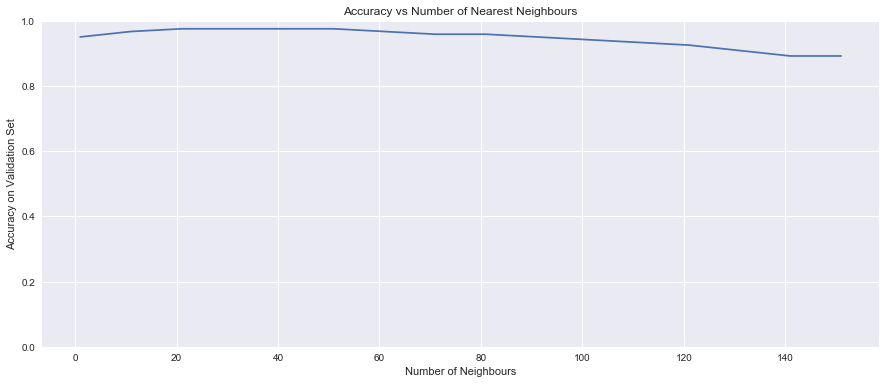

In [14]:
plt.ylim([0,1])
plt.plot(range(151,0,-10),accuracy_validation)
plt.title("Accuracy vs Number of Nearest Neighbours")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy on Validation Set")

In [15]:
### In case of very large value of k, we may include points from other classes into the neighborhood.
### In case of too small value of k the algorithm is very sensitive to noise

##Its better to take k = 51 for further calculation. 

### Experiment 2
#### Changing the different metrics for KNN Classifier

In [70]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
metric = ["euclidean","manhattan","hamming"]
accuracy_validation = [None]*3
count=0
for p in range(0,3):
    classifier = KNeighborsClassifier(n_neighbors = 51, metric = metric[p])
    classifier.fit(X_train, y_train)
    accuracy_validation[count] = classifier.score(X_val,y_val)
    count+=1

In [71]:
accuracy_validation

[0.975, 0.975, 0.6333333333333333]

Text(0,0.5,'Accuracy on Validation Set')

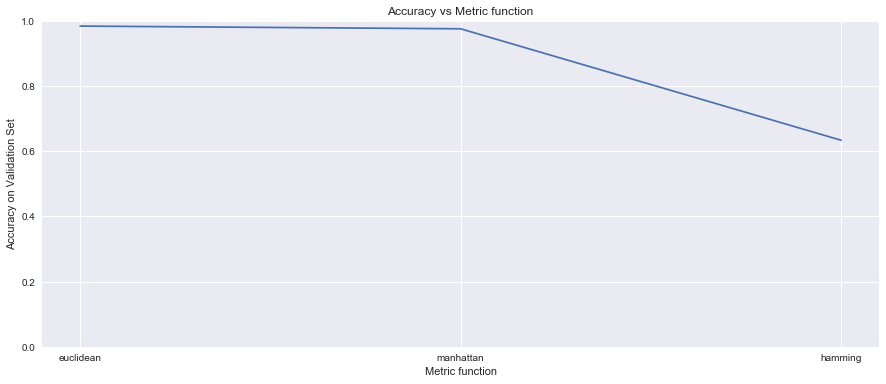

In [19]:
plt.ylim([0,1])
plt.plot(metric,accuracy_validation)
plt.title("Accuracy vs Metric function")
plt.xlabel("Metric function")
plt.ylabel("Accuracy on Validation Set")


As we see, Euclidean has a better accuracy in this scenario¶
so we use Euclidean Metric in our K-NN Model
Cross Validation Scores

In [76]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 51, metric = 'euclidean')
classifier.fit(X_train, y_train)


print('Train accuracy = {0}%'.format(np.round(classifier.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(classifier.score(X_test, y_test) * 100, 2)))
predictions = classifier.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 92.81%
Test accuracy = 94.15%

 Confusion Matrix: 

[[107   1]
 [  9  54]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.92      0.99      0.96       108
          1       0.98      0.86      0.92        63

avg / total       0.94      0.94      0.94       171



In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
classifier = KNeighborsClassifier(n_neighbors =41, metric ='euclidean',p=2)

r = y_train.shape

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train.values.reshape(r,),cv=10)

In [79]:
print(accuracies.mean())
print(accuracies.std())

0.9250319284802044
0.06332872191771463


# Student Math Grade prediction using KNN

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns

In [81]:

data = pd.read_csv("student-mat.csv",sep = ";")
median = data['G3'].median()
data['G3'] = np.where(data['G3']>=median, 1, 0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0


## Make Dummy variables

In [82]:
data = data.drop(["G1","G2"], axis=1)
data = pd.get_dummies(data,drop_first = True)
train, test = train_test_split(data, test_size=0.3,random_state=23)
X_train=train.drop(['G3'], axis = 1)
y_train=train['G3']
X_test=test.drop(['G3'],axis = 1)
y_test=test['G3']
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)


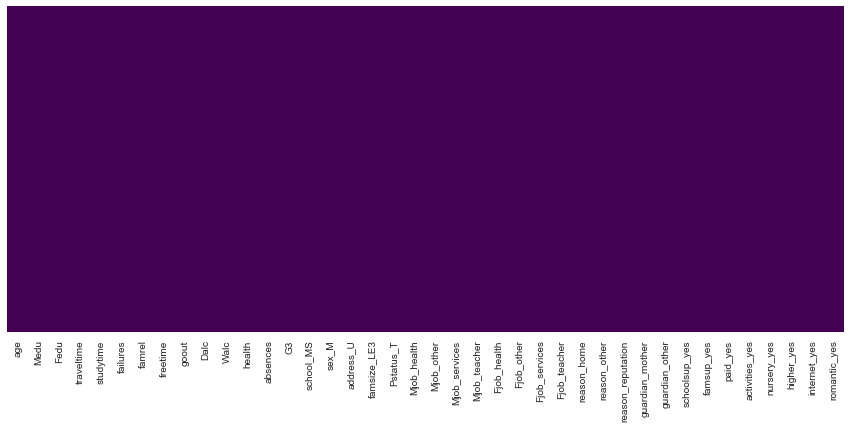

In [83]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Normalized

In [84]:
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_val = X_sca.fit_transform(X_val)
X_test = X_sca.transform(X_test)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


print('Train accuracy = {0}%'.format(np.round(classifier.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(classifier.score(X_test, y_test) * 100, 2)))
predictions = classifier.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 77.72%
Test accuracy = 52.94%

 Confusion Matrix: 

[[25 22]
 [34 38]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.42      0.53      0.47        47
          1       0.63      0.53      0.58        72

avg / total       0.55      0.53      0.53       119



### Experiment 1
#### Number of neighbours in KNN

In [86]:
accuracy_validation = [None]*16



count=0    
for noOfNeighbours in range(151,0,-10):
    # Fitting K-NN to the Training set
    classifier = KNeighborsClassifier(n_neighbors = noOfNeighbours, metric = 'euclidean', p = 2)
    classifier.fit(X_train, y_train)
    accuracy_validation[count] = classifier.score(X_val,y_val)  
    count+=1

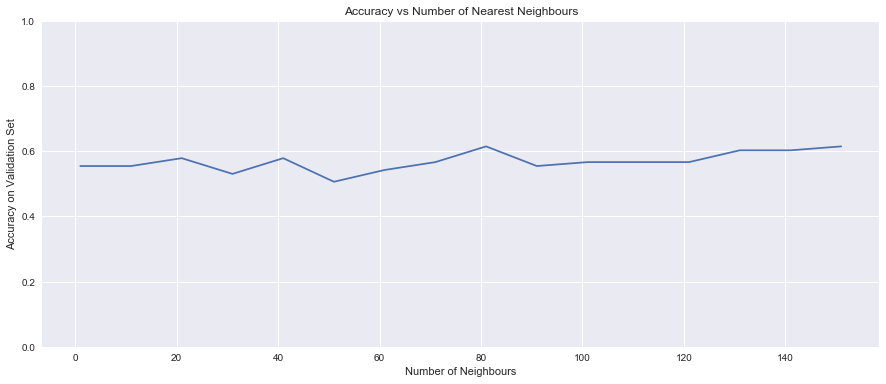

In [87]:
plt.ylim([0,1])
plt.plot(range(151,0,-10),accuracy_validation)
plt.title("Accuracy vs Number of Nearest Neighbours")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy on Validation Set")

In [47]:
accuracy_validation

[0.6144578313253012,
 0.6024096385542169,
 0.6024096385542169,
 0.5662650602409639,
 0.5662650602409639,
 0.5662650602409639,
 0.5542168674698795,
 0.6144578313253012,
 0.5662650602409639,
 0.5421686746987951,
 0.5060240963855421,
 0.5783132530120482,
 0.5301204819277109,
 0.5783132530120482,
 0.5542168674698795,
 0.5542168674698795]

Experiment 2
Changing the different metrics for KNN Classifier

In [88]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
metric = ["euclidean","manhattan","hamming"]
accuracy_validation = [None]*3
count=0
for p in range(0,3):
    classifier = KNeighborsClassifier(n_neighbors = 145, metric = metric[p])
    classifier.fit(X_train, y_train)
    accuracy_validation[count] = classifier.score(X_val,y_val)
    count+=1

In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 145, metric = 'euclidean', p = 2)
classifier.fit(X_train, y_train)


print('Train accuracy = {0}%'.format(np.round(classifier.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(classifier.score(X_test, y_test) * 100, 2)))
predictions = classifier.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 59.59%
Test accuracy = 60.5%

 Confusion Matrix: 

[[ 9 38]
 [ 9 63]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.50      0.19      0.28        47
          1       0.62      0.88      0.73        72

avg / total       0.57      0.61      0.55       119



In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
classifier = KNeighborsClassifier(n_neighbors = 145, metric ='euclidean',p=2)

r = y_train.shape

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train.values.reshape(r,),cv=10)

In [94]:
print(accuracies.mean())
print(accuracies.std())

0.5864035087719299
0.08464457764363328
